# Workshop 3

## User Defined Functions

As well as the functions built in to Python, sometimes we want to write our own functions.

There are two main reasons for this:
* If you want to repeat the same task lots of times, it is easier to use a function that copy and paste the same piece of code.
* When you are writing longer scripts, it is easier to read code if it is divided into function.

A function has an input and an output.  We define a function using the `def` command.

In [1]:
def myfunction(mystring):
    newstring = "%s is my string" % mystring
    return newstring

When you run this code, Python loads the function into its memory, but doesn't actually run the function - it is just stored reading to use.
The input for the function above is `mystring` and the output is `newstring`.

The `return` value of a function another name for its output. You can assign the output of a function to a variable.

In [2]:
x = myfunction('hello')
print (x)

hello is my string


In [3]:
y = 'goodbye'
x = myfunction(y)
print (x)

goodbye is my string


To define functions, we need to rememeber the concept of `arguments` as the input to functions.

The names that you give to the arguments when you pass them to the function do not need to be the same as the arguments inside the function.  This can be slightly confusing.

In [4]:
def another_function(x, y):
    tot = x + y
    return (tot)

In [5]:
another_function(1, 2)

3

In [6]:
v = 1
w = 2
another_function(v, w)

3

In [7]:
v = 1
w = 2
another_function(x=v, y=w)

3

Just like for in-built functions, the function decides which argument is which based on either their order or the names inside the brackets when you call the function.

**Exercise** 

Write a function which returns the mean of two numbers and call the function in Python.

*Bonus: Write and call a function which returns the mean of any number of integers, using a for loop and a list as an argument.*

Inside a function we can combine several steps.

For example, this function checks how many lines are inside a file.

In [8]:
def countLines(infile):
    lines = open(infile).readlines()
    x = 0
    for line in lines:
        x += 1
    return (x)

In [9]:
countLines('lines1.txt')

4

In [10]:
countLines('lines2.txt')

5

We can add to this function to instead return True if the number of lines is even or False is the number of lines is odd.

In [11]:
def countLinesOddEven(infile):
    lines = open(infile).readlines()
    x = 0
    for line in lines:
        x += 1
    if x % 2 == 0:
        iseven = True
    else:
        iseven = False
    return (iseven)

In [12]:
countLinesOddEven('lines1.txt')

True

In [13]:
countLinesOddEven('lines2.txt')

False

**Exercise**
* Modify the function to return the total number of characters in the file (you can use the `len` function to find the number of characters in a string).

*Bonus: Instead, return a list of the lengths of all the lines in the file*

It's also possible to generate functions which have no arguments, or functions which return nothing.  These are sometimes useful.

For example, if you always need the same list of column names for your file, you can use a function to get them each time.

In [14]:
def getColumnNames():
    return (["name", "start_position", "end_position", "strand"])

In [15]:
x = getColumnNames()
print (x)

['name', 'start_position', 'end_position', 'strand']


If you do something to the output file inside the function you may not need to return anything.

In [16]:
def removeSpaces(infile, outfile):
    inf = open(infile).readlines()
    out = open(outfile, "w")
    for line in inf:
        out.write(line.replace(" ", ""))
    out.close()

In [17]:
removeSpaces('removespaces.txt', "nospaces.txt")

If you look at the file `nospaces.txt` you will see the result of running this function.

## Pandas

We will now briefly look at a specific Python module - `pandas` - for dealing with dataframes (tables of data), as it is often useful.

The convention is to rename `pandas` as `pd` when we import it.

In [18]:
import pandas as pd

Pandas can be used to read, write and parse tab or comma delimited tables.

These are text files where the columns are seperated by either tabs or commas.

We can read a table using the `pd.read_csv` function.

In [19]:
comma_delim = pd.read_csv("commadelim.txt")

In Jupyter, if you just type the name of a `pandas` dataframe it will display it nicely.

In [20]:
comma_delim

,Name,Age,Location
0,Katy,33,Cambridge
1,Mary,75,London
2,Bob,44,Oxford


For a tab delimited table we have to add an extra argument, to tell Python that the table is tab delimited.

`\t` represents a tab character in Python.

In [21]:
tab_delim = pd.read_csv("tabdelim.txt", sep="\t")

In [22]:
tab_delim

,Name,Age,Location
0,Katy,33,Cambridge
1,Mary,75,London
2,Bob,44,Oxford


We can easily sort tables in pandas with the `sort_values` method.

In [23]:
tab_delim = tab_delim.sort_values('Age')

In [24]:
tab_delim

,Name,Age,Location
0,Katy,33,Cambridge
2,Bob,44,Oxford
1,Mary,75,London


It's also easy to delete or add a row or column

We can delete rows or columns using the `drop` method.  It refers to rows as axis 0 and columns as axis 1.

We access rows using the row number from the left side of the table.

In [25]:
tab_delim = tab_delim.drop(0, axis=0)

In [26]:
tab_delim

,Name,Age,Location
2,Bob,44,Oxford
1,Mary,75,London


We access columns using the column names.

In [27]:
tab_delim = tab_delim.drop('Name', axis=1)

In [28]:
tab_delim

,Age,Location
2,44,Oxford
1,75,London


To add a column or row, we can use a list.

For columns, we give the column name we want to add in square brackets after the table variable name.

In [29]:
tab_delim['Name'] = ['Bob', 'Mary']

In [30]:
tab_delim

,Age,Location,Name
2,44,Oxford,Bob
1,75,London,Mary


For rows, we do the same but we add `.loc` before the first square bracket.

In [31]:
tab_delim.loc[0] = [33, 'Cambridge', 'Katy']

In [32]:
tab_delim

,Age,Location,Name
2,44,Oxford,Bob
1,75,London,Mary
0,33,Cambridge,Katy


We access the data in the rows and columns in a similar way.

In [33]:
tab_delim['Age']

2    44
1    75
0    33
Name: Age, dtype: int64

In [34]:
tab_delim.loc[2]

Age             44
Location    Oxford
Name           Bob
Name: 2, dtype: object

If we want to use this data, for example in a loop, it can be easier to convert it to a list first.  The list will always be in the same order as the data in the table.

In [35]:
ages = list(tab_delim['Age'])
print (ages)

[44, 75, 33]


In [36]:
bobs_data = list(tab_delim.loc[2])
print (bobs_data)

[44, 'Oxford', 'Bob']


To write a table to file, we used the table name plus the `to_csv` variable.

In [37]:
tab_delim.to_csv("mytable.tsv", sep="\t")

Regardless of the input file format, the output file will be comma delimited unless we specify `sep="\t"`

**Exercise**
* Make a tab delimited table in a text editor and save it in the folder with your notebook.  Make sure there are column headings and at least one column is numerical (integers or floats).
* Read the table into Python
* Sort the table by the numerical column
* Add a new column in Python
* Add a new row in Python
* Delete a column
* Add a column
* Output the new table to a text file.

*Bonus: Try to make an additional column with a transformation applied to the numerical column, e.g. add 1 to all the numbers and put this in a new column.*

# Plotting

It is possible to draw graphs directly in Python, this makes it much easier to update the graphs when you update your data.

To do this we'll use a module called `matplotlib`

The simplest way to use matplotlib is with the interactive `plt` command.

In [38]:
import matplotlib.pyplot as plt

In [39]:
import seaborn as sns

First we'll make two lists of random integers, so that we have something to plot.

We need to import the random module to be able to do this.

In [40]:
import random

We can generate the numbers in a for loop and store them in a list.

In [41]:
data1 = list()
data2 = list()
for i in range(0, 50):
    data1.append(random.randint(0, 100))
    data2.append(random.randint(0, 100))

In [42]:
print (data1)

[36, 18, 30, 54, 28, 68, 17, 0, 37, 66, 71, 56, 43, 57, 2, 38, 13, 67, 18, 29, 87, 63, 58, 68, 42, 27, 77, 68, 100, 53, 94, 17, 38, 98, 17, 35, 84, 74, 85, 63, 43, 42, 4, 74, 58, 68, 14, 82, 66, 62]


In [43]:
print (data2)

[85, 92, 0, 98, 13, 42, 26, 16, 41, 98, 5, 2, 63, 12, 76, 18, 52, 50, 63, 31, 13, 28, 84, 81, 99, 60, 85, 64, 30, 54, 34, 49, 90, 32, 100, 59, 6, 19, 22, 41, 86, 16, 14, 24, 59, 90, 21, 80, 57, 71]


The most simple `plt` command is just to plot a line graph of a dataset.

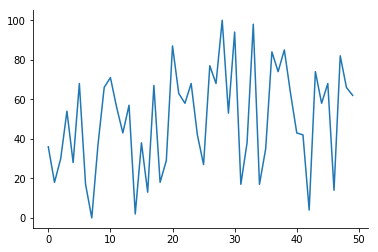

In [44]:
# plot the first set of data points
plt.plot(data1)

# Remove extra axis
sns.despine()

# Save the file as "test.png"
plt.savefig("test.png", bbox_inches='tight')

# show the plot and remove it from memory
plt.show()


We can edit this plot in various ways.  We need to regenerate the plot each time, because after using plt.show() matplotlib no longer stores the plot in memory.  This also means we always need to save the plot before displaying it.

We can easily add additional datasets to the plot.

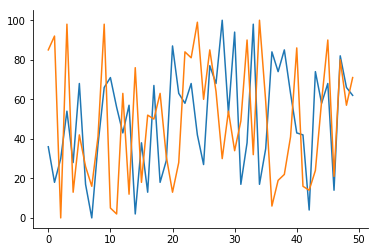

In [45]:
# plot the first set of data points
plt.plot(data1)

# plot the second set of data points
plt.plot(data2)

# Remove extra axis
sns.despine()

# Save the file as "test.png"
plt.savefig("test.png", bbox_inches='tight')

# show the plot and remove it from memory
plt.show()


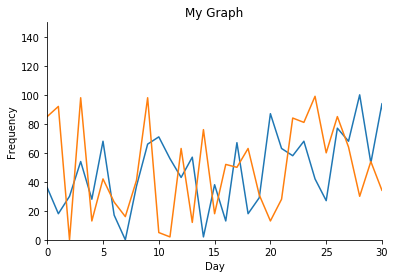

In [46]:
# plot the first set of data points
plt.plot(data1)

# plot the second set of data points
plt.plot(data2)

# Remove extra axis
sns.despine()

# Label the x and y axis
plt.xlabel("Day")
plt.ylabel("Frequency")

# Set the axis limits
plt.xlim([0, 30])
plt.ylim([0, 150])

# Add a title
plt.title("My Graph")

# Save the file as "test.png"
plt.savefig("test.png", bbox_inches='tight')

# show the plot and remove it from memory
plt.show()


You can change the colours using the argument `color`.

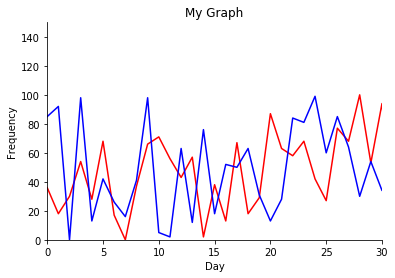

In [47]:
# plot the first set of data points
plt.plot(data1, color='red')

# plot the second set of data points
plt.plot(data2, color='blue')

# Remove extra axis
sns.despine()

# Label the x and y axis
plt.xlabel("Day")
plt.ylabel("Frequency")

# Set the axis limits
plt.xlim([0, 30])
plt.ylim([0, 150])

# Add a title
plt.title("My Graph")

# Save the file as "test.png"
plt.savefig("test.png", bbox_inches='tight')

# show the plot and remove it from memory
plt.show()

You can set the positions and labels on the `ticks` on the x and y axis.

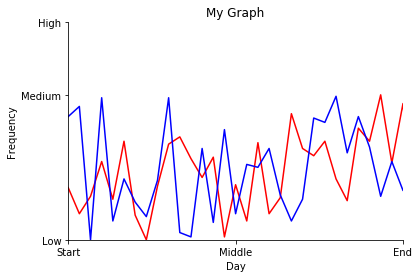

In [48]:
# plot the first set of data points
plt.plot(data1, color='red')

# plot the second set of data points
plt.plot(data2, color='blue')

# Remove extra axis
sns.despine()

# Label the x and y axis
plt.xlabel("Day")
plt.ylabel("Frequency")

# Set the axis limits
plt.xlim([0, 30])
plt.ylim([0, 150])

# Set the x and y tick positions and labels
plt.xticks([0, 15, 30], ['Start', 'Middle', 'End'])
plt.yticks([0, 100, 150], ['Low', 'Medium', 'High'])

# Add a title
plt.title("My Graph")

# Save the file as "test.png"
plt.savefig("test.png", bbox_inches='tight')

# show the plot and remove it from memory
plt.show()

**Exercise**
* Generate three sets of 100 random integers.
* Plot them using `matplotlib`.
* Change the axis ylabels and title.
* Change the colours.
* Change the positions and labels of the ticks on the y axis.
* Save the plot.
* View the plot.

 *Bonus: Store the three sets of integers in a dictionary and use the dictionary in the `plt` function calls.  Use a second dictionary to store the colour for each data series*

You can also generate other types of plot and change the parameters in a similar way.

For a bar chart, you need to generate a `range` to set the positions of the bars on the x axis.

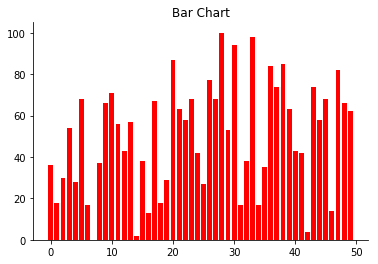

In [49]:
n = range(0, len(data1))
plt.bar(n, data1, color='red')
plt.title("Bar Chart")
sns.despine()
plt.show()

For a scatter plot, you always need two data series and you provide the x positions as the first argument and the y positions as the second argument.

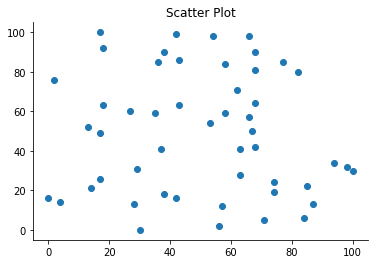

In [50]:
plt.scatter(data1, data2)
plt.title("Scatter Plot")
sns.despine()
plt.show()

For a pie chart we'll use the first few data points in the list.

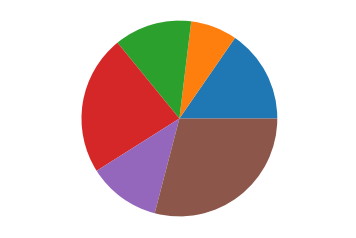

In [51]:
plt.pie(data1[0:6])
plt.axis('equal') # make the x and y axis the same length
plt.show()

**Exercise**

Generate your own bar chart, pie chart and scatter plot.

*Bonus: Use the `plt.hist` function to generate a histogram*

There is much more information about matplotlib in another tutorial I wrote here:
    https://cgatoxford.wordpress.com/2017/05/10/matplotlib-tutorial/, plus on the matplotlib website https://matplotlib.org/.

# Other Useful Methods

## Strings

`split`: Split a string into a list based on a character in the string.

In [52]:
x = 'This_Is_My_String'
xbits = x.split("_")

In [53]:
print (xbits)

['This', 'Is', 'My', 'String']


`join`: Join strings together using a character.  For some reason this is used the other way around.

In [54]:
y = "!".join(xbits)

In [55]:
print (y)

This!Is!My!String


`replace`: Replace part of the string with something else

In [56]:
z = y.replace("!", "!!!!!!")

In [57]:
print (z)

This!!!!!!Is!!!!!!My!!!!!!String


`find`: Find the position of a substring in a string (gives the first position only).

In [58]:
print(z.find("!"))

4


`count`: Count the number of times a substring occurs in a string.

In [59]:
print(z.count("!"))

18


`upper` makes everything upper case

In [60]:
z.upper()

'THIS!!!!!!IS!!!!!!MY!!!!!!STRING'

`lower` makes everything lower case

In [61]:
z.lower()

'this!!!!!!is!!!!!!my!!!!!!string'

## Floats

`round`: rounds the float to a certain number of decimal places

In [62]:
x = 0.035125

In [63]:
round(x, 5)

0.03513

`math.ceil` rounds a float to the integer above.

In [64]:
import math
math.ceil(x)

1

`math.floor` rounds a float to the integer below.

In [65]:
math.floor(x)

0

## Lists

`extend` appends a list to another list

In [66]:
L1 = ['a', 'b', 'c', 'd']
L2 = ['A', 'B', 'C', 'D']

In [67]:
L1.extend(L2)

`enumerate` automatically generates an index for each item in a list.

In [68]:
for item in enumerate(L1):
    print (item)

(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')
(4, 'A')
(5, 'B')
(6, 'C')
(7, 'D')


`count` counts how many times an item appears in a list

In [69]:
L = ['a', 'a', 'a', 'b', 'c']

In [70]:
print(L.count('a'))

3


## Dictionaries

`update` combines two dictionaries (the second dictionary will replace items in the first with the same key)

In [71]:
x = {'a': 1, 'b': 2, 'c': 4}
y = {'c': 6, 'd': 8}

In [72]:
x.update(y)

In [73]:
print (x)

{'a': 1, 'b': 2, 'c': 6, 'd': 8}


# Some common modules to look up

* re - regular expression operations: https://docs.python.org/3/library/re.html
* os - operating system functions: https://docs.python.org/3/library/os.html
* shutil - file operations (e.g. copying and moving files): https://docs.python.org/3/library/shutil.html?
* glob - finding files using wildcards: https://docs.python.org/3/library/glob.html
* importlib - additional import options: https://docs.python.org/3/library/importlib.html
* math - mathematical functions: https://docs.python.org/3/library/math.html
* sys - system options and parameters: https://docs.python.org/3/library/sys.html

# Final Exercise

* Read the tab delimited table `student_data.txt` into Python using pandas
* Display the table in jupyter
* Import the module `numpy` and use the `numpy.mean` function to calculate the mean age and mean score.
* Write a function called `score_percentage` which returns the score as a percentage of 50.
* Using a `for` loop calculate the score percentage for each person and store it in a list.
* Add this list to a table column called "Score_Percentage"
* Plot a scatter plot using `matplotlib`, with age on the x axis and score percentage on the y axis
* Write a function to assign each student a score of "A" if their score percentage is greater than or equal to 70, "B" if their score percentage is greater than or equal to 60 but less than 70 and "C" if their score percentage is less than 60.
* Use this function to generate a "Final_Grade" column and add it to the table
* Plot a barchart using matplotlib to show how many students got an "A", how many got a "B" and how many got a "C".  Position and label the x ticks appropriately.  Change the colour and save the bar chart.
* Assign each student a random ID number using the random.randint function and add these to the table.
* Store the table in a tab delimted output file.
* *Bonus: Using string formatting and a `for` loop, make an output file called [Name].txt for each student which says "Dear [Name], your score was [score_percentage] and your grade was [Final_Grade]", based on the data in the table (fill in the square brackets with the correct data).*

# Resources

**Online Material**

https://docs.python.org has the official documentation for all Python functions and modules.

* Software Carpentry: http://swcarpentry.github.io/python-novice-inflammation/

    Beginner's Python course with some additional content (especially debugging)


* Codeacademy http://www.codeacademy.com

    Interactive course for beginners


* Learn Pandas: https://bitbucket.org/hrojas/learn-pandas

    Lots of additional information about using pandas dataframes


* Numpy: https://docs.scipy.org/doc/numpy/user/quickstart.html

    Arrays, matrices and numerical operations


* Datacamp: http://www.datacamp.com

    Lots of courses about specific aspects of Python and other languages.  Not free.


* Learn Python http://www.learnpython.org


* Coursera (http://www.coursera.org/courses?query=python), EdX (https://www.edx.org/learn/python) and YouTube have lots of different courses.

    I would recommend:

    http://www.coursera.org/learn/python For beginners

    https://www.edx.org/course/introduction-to-computer-science-and-programming-using-python-0 Slightly more complex and computer science orientated




** Forums **
* Stack Overflow: http://www.stackoverflow.com

    Scary but comprehensive
 
 
* Reddit Learn Python http://www.reddit.com/r/learnpython/
    
    More accessible

** Exercises **
* http://www.reddit.com/r/dailyprogrammer/
* http://www.leetcode.com/problemset/all/
* http://www.codingbat.com/python
* http://rosalind.info

**Books**
* Learn Python the Hard Way http://www.souravsengupta.com/cds2015/python/LPTHW.pdf
* Python for Biologists http://userpages.fu-berlin.de/digga/p4b.pdf and Advanced Python for Biologists 
* Learn Python http://mmc.geofisica.unam.mx/edp/Herramientas/Lenguajes/Python/Learning%20Python,%205th%20Edition.pdf